# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane appear to have the lowest mean calcualtions for tumor volume and may be two of the more effective drugs in decreasing the size of the tumor(s). This can also be seen in the boxplot, which shows the final tumor volume is also the lowest for Capomulin and Ramicane drug regimens. 

The Capomulin drug regimen seemed to be most effective after being on it for longer. The mouse example chosen, Mouse g316, in the line plot shows a rapid decrease in final tumor volume after 40 days.

There is a very strong positive correlation between mouse weight and average tumor volume. This can be seen in the scatter plot and the linear regression line. This correlation shows that the more a mouse weighs than the larger tumor size they have (on average). 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice = data_df['Mouse ID'].nunique()
mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = data_df.loc[data_df['Mouse ID'] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
st_dev = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()                                            
SEM = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()                                             
                                                                                              
                                               
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary = pd.DataFrame({'Mean Tumor Volume': mean,
                      'Median Tumor Volume': median,
                      'Tumor Volume Variance': variance,
                      'Tumor Volume Std.Dev.': st_dev,
                      'Tumor Volume Std.Err': SEM})                                          
                                            
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using she aggregation method, produce the same summary statistics in a single line.
summary_agg = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

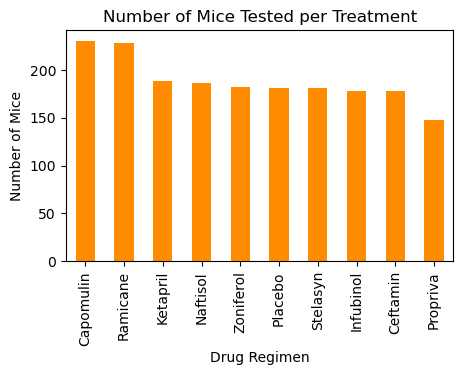

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_pd = clean_data['Drug Regimen'].value_counts().plot(kind='bar', color='darkorange', figsize=(5,3))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Treatment")
plt.show()

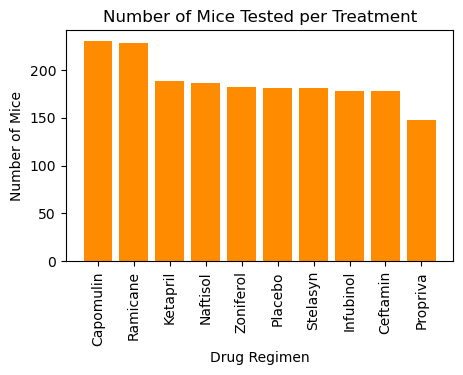

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

y = clean_data['Drug Regimen'].value_counts()
                    
plt.figure(figsize=(5,3))                    
plt.bar(y.index.values, y.values, color='darkorange', align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested per Treatment")
plt.xticks(rotation=90)

plt.show()

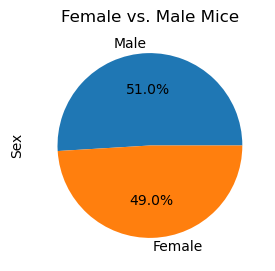

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_pd = clean_data['Sex'].value_counts()
plt.title("Female vs. Male Mice")
gender_pd.plot(kind='pie', autopct= "%1.1f%%", figsize=(4,3))
plt.show()

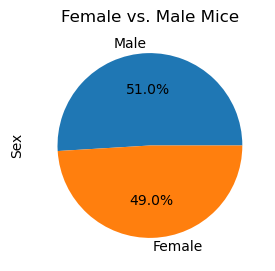

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.figure(figsize=(4,3))   
plot = gender_pd.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Female vs. Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [15]:
max_df = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_df

# Merge max timepoint onto data_df
merged_df = pd.merge(clean_data, max_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
    
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


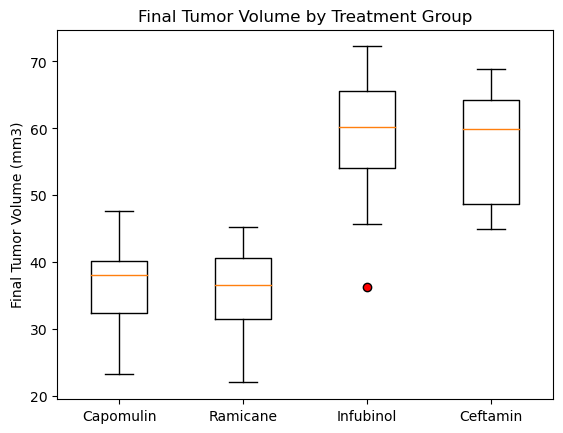

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='r', markersize=6)

plt.boxplot(drug_values, flierprops=flierprops)

plt.title('Final Tumor Volume by Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

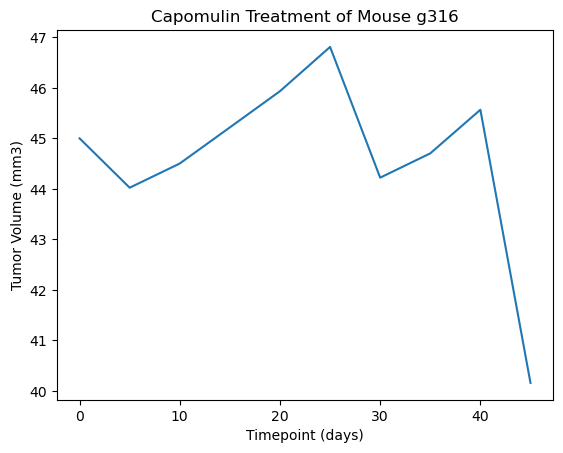

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line = clean_data.loc[clean_data['Mouse ID'] == 'g316']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(line['Timepoint'], line['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse g316")

# Display plot
plt.show()

In [19]:

Capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin',:]
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=('Mouse ID','Timepoint'),how='left')
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


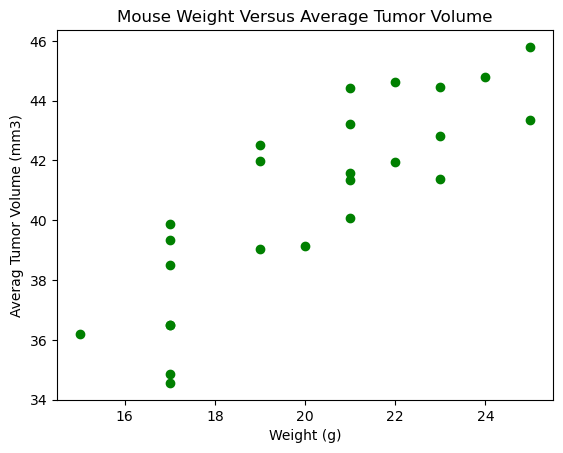

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=12
plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'], color="green")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


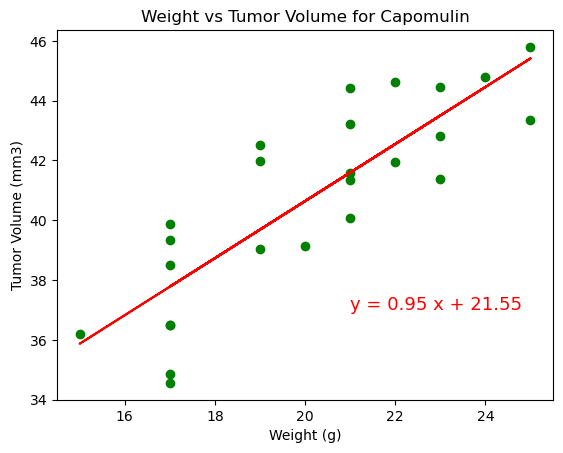

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'])
regress_values=avg_vol['Weight (g)']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_vol['Weight (g)'],avg_vol['Tumor Volume (mm3)'],color='green')
plt.plot(avg_vol['Weight (g)'], regress_values, color='red')
plt.annotate(line_eq,(21,37), fontsize=13, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.show()